# Evaluation examples

In [50]:
import numpy as np
from clustercausal.experiments.Simulator import Simulator
from clustercausal.experiments.Evaluator import Evaluator
from clustercausal.algorithms.ClusterPC import ClusterPC
from clustercausal.clusterdag.ClusterDAG import ClusterDAG
from clustercausal.utils.Utils import *
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [51]:
simulation = Simulator(n_nodes = 9, n_edges = 15, seed = 12343)
cluster_dag = simulation.run()

2023-07-26 12:36:33,202 - c:\Users\JanMarco\MLProjects\Masterthesis\masterthesis\mthesis\lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


In [52]:
print(cluster_dag.cluster_mapping)
print(cluster_dag.cluster_edges)

{'C1': ['X1', 'X4'], 'C2': ['X7', 'X3', 'X6'], 'C3': ['X2', 'X5', 'X8', 'X9']}
[('C1', 'C2'), ('C1', 'C3')]


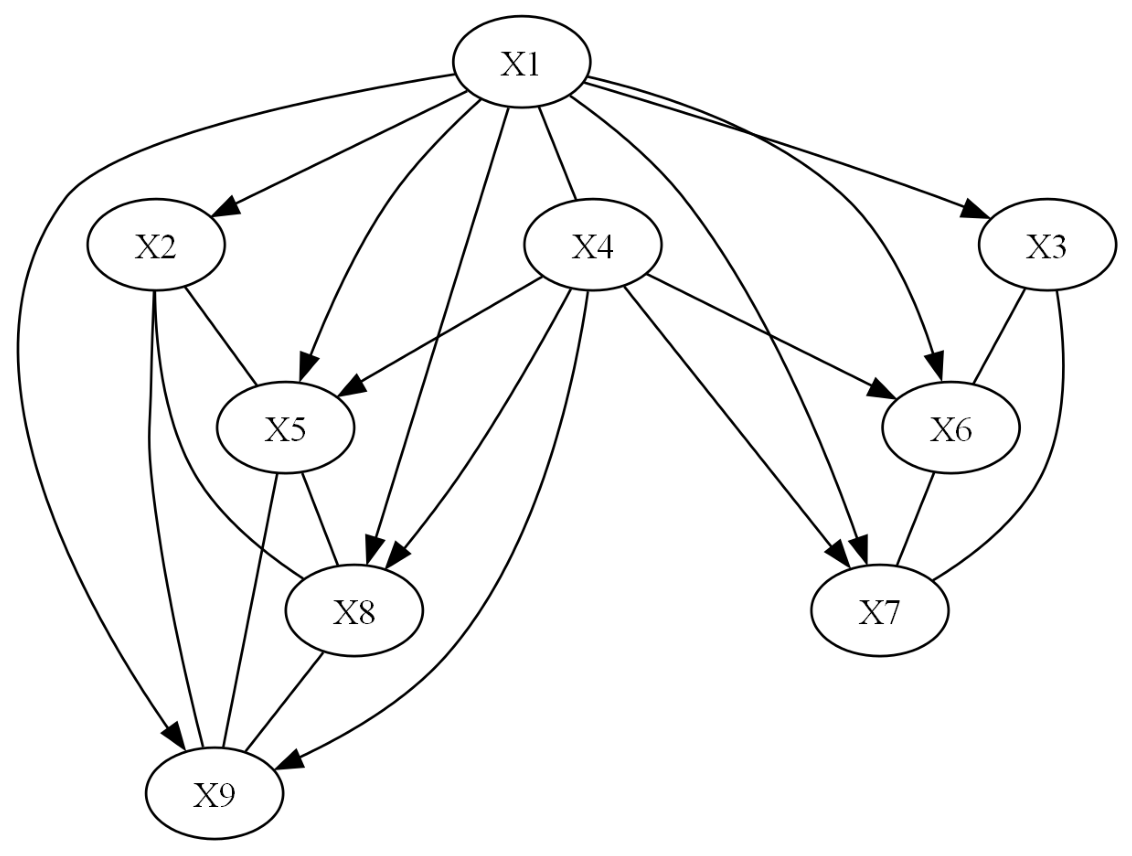

In [53]:
cluster_dag.cdag_to_mpdag()
cluster_dag.draw_mpdag()

In [54]:
cluster_pc = ClusterPC(cdag = cluster_dag, data = cluster_dag.data, alpha = 0.05, \
                  indep_test = "fisherz", \
                  verbose = False, show_progress=True)
est_graph = cluster_pc.run()


Beginning work on cluster C1

Intra phase in cluster C1


Depth=0, working on node 3: 100%|██████████| 2/2 [00:00<00:00, 500.36it/s] 



Beginning work on cluster C2

Inter phase between low cluster C2 and parent C1


Depth=2, working on node 6: 100%|██████████| 5/5 [00:00<00:00, 626.71it/s] 


Deleted edge from X1 to X4
Deleted edge from X4 to X7
Deleted edge from X6 to X4
Deleted edge from X6 to X7

Intra phase in cluster C2


Depth=2, working on node 6: 100%|██████████| 3/3 [00:00<00:00, 754.24it/s] 



Beginning work on cluster C3

Inter phase between low cluster C3 and parent C1


Depth=2, working on node 8: 100%|██████████| 6/6 [00:00<00:00, 599.24it/s] 


Deleted edge from X5 to X1
Deleted edge from X4 to X5
Deleted edge from X2 to X5
Deleted edge from X4 to X9
Deleted edge from X9 to X2
Deleted edge from X4 to X8
Deleted edge from X8 to X5

Intra phase in cluster C3


Depth=2, working on node 8: 100%|██████████| 4/4 [00:00<00:00, 995.56it/s] 

Applying edge orientation rules
Duration of algorithm was 0.12419533729553223sec


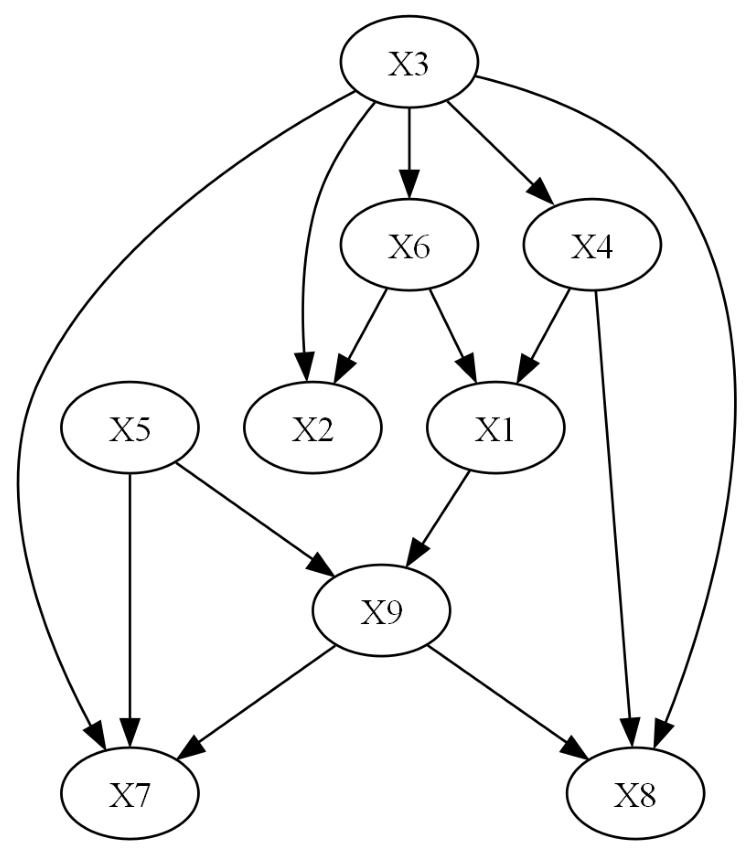

In [68]:
cluster_dag.true_dag.draw_pydot_graph()

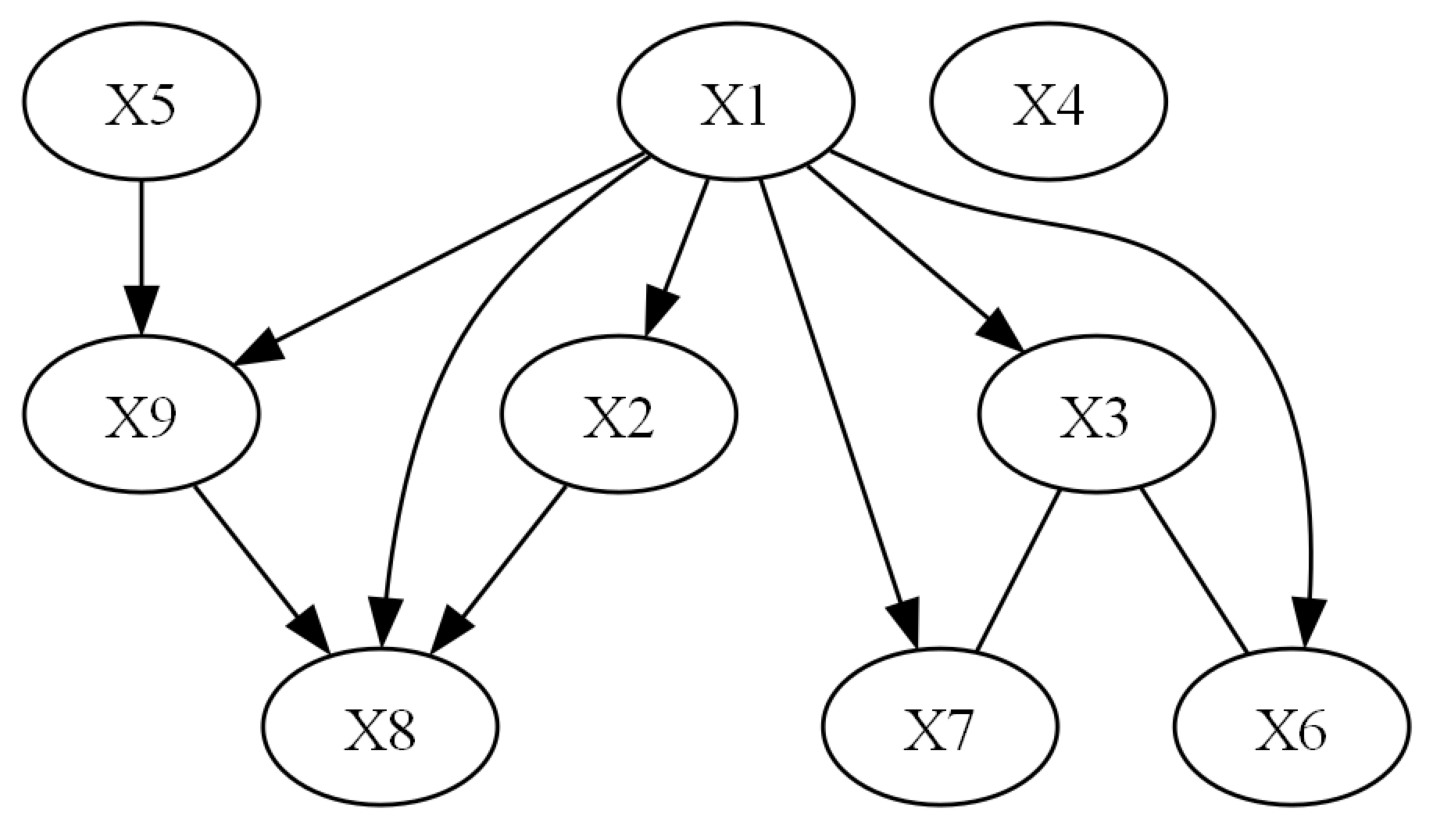

In [55]:
est_graph.draw_pydot_graph()

In [67]:
evaluation = Evaluator(truth = cluster_dag.true_dag.G, est = est_graph.G)
adjacency_confusion, arrow_confusion, shd = evaluation.get_causallearn_metrics()
print("Adjacency confusion: ", adjacency_confusion)
print("Arrow confusion: ", arrow_confusion)
print("SHD: ", shd)

Adjacency confusion:  {'true_positive': 6, 'false_positive': 5, 'false_negative': 8, 'true_negative': 17, 'precision': 0.5454545454545454, 'recall': 0.42857142857142855}
Arrow confusion:  {'true_positive': 3.0, 'false_positive': 6.0, 'false_negative': 11.0, 'true_negative': 61.0, 'precision': 0.3333333333333333, 'recall': 0.21428571428571427, 'true_positive_ce': 3.0, 'false_positive_ce': 1.0, 'false_negative_ce': 3.0, 'true_negative_ce': 74.0, 'precision_ce': 0.75, 'recall_ce': 0.5}
SHD:  14
